# Making things simpler with MOABB (Part 3)

In this last part, we extend the previous example by assessing the classification score of not one but three classification pipelines. Once again, we begin by importing all the required packages to make the script work.

In [2]:
%matplotlib inline

import moabb
from moabb.datasets import BNCI2014001, Weibo2014, Zhou2016
from moabb.paradigms import LeftRightImagery
from moabb.evaluations import WithinSessionEvaluation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

from mne.decoding import CSP
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mne
mne.set_log_level("CRITICAL")

moabb.set_log_level('info')
import warnings
warnings.filterwarnings("ignore")

Then, we instantiate the three different classiciation pipelines to be considered in the analysis. The object that gathers each pipeline is a dictionary.

In [3]:
pipelines = {}
pipelines['csp+lda'] = make_pipeline(CSP(n_components=8), LDA())
pipelines['tgsp+svm'] = make_pipeline(Covariances('oas'), TangentSpace(metric='riemann'), SVC(kernel='linear'))
pipelines['MDM'] = make_pipeline(Covariances('oas'), MDM(metric='riemann'))

The following lines go exactly as in the previous examples.

In [4]:
datasets = [BNCI2014001(), Weibo2014(), Zhou2016()]
paradigm = LeftRightImagery()
evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets, overwrite=True)
results = evaluation.process(pipelines) 
results.to_csv('../results/results_part2-3.csv')

2019-09-04 10:58:40 desktop-270 root[1324] INFO Processing dataset: 001-2014
2019-09-04 10:58:48 desktop-270 root[1324] INFO csp+lda | 001-2014 | 1 | session_E: Score 0.954
2019-09-04 10:58:51 desktop-270 root[1324] INFO tgsp+svm | 001-2014 | 1 | session_E: Score 0.970
2019-09-04 10:58:53 desktop-270 root[1324] INFO MDM | 001-2014 | 1 | session_E: Score 0.939
2019-09-04 10:58:53 desktop-270 root[1324] INFO csp+lda | 001-2014 | 1 | session_T: Score 0.932
2019-09-04 10:58:55 desktop-270 root[1324] INFO tgsp+svm | 001-2014 | 1 | session_T: Score 0.948
2019-09-04 10:58:56 desktop-270 root[1324] INFO MDM | 001-2014 | 1 | session_T: Score 0.948
2019-09-04 10:59:04 desktop-270 root[1324] INFO csp+lda | 001-2014 | 2 | session_E: Score 0.641
2019-09-04 10:59:05 desktop-270 root[1324] INFO tgsp+svm | 001-2014 | 2 | session_E: Score 0.647
2019-09-04 10:59:07 desktop-270 root[1324] INFO MDM | 001-2014 | 2 | session_E: Score 0.537
2019-09-04 10:59:07 desktop-270 root[1324] INFO csp+lda | 001-2014 |

Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:00:56 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:01:02 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 1 | session_0: Score 0.798
2019-09-04 11:01:10 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 1 | session_0: Score 0.853
2019-09-04 11:01:17 desktop-270 root[1324] INFO MDM | Weibo 2014 | 1 | session_0: Score 0.445


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:01:28 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:01:34 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 2 | session_0: Score 0.957
2019-09-04 11:01:40 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 2 | session_0: Score 0.973
2019-09-04 11:01:45 desktop-270 root[1324] INFO MDM | Weibo 2014 | 2 | session_0: Score 0.704


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:01:55 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:02:02 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 3 | session_0: Score 0.415
2019-09-04 11:02:07 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 3 | session_0: Score 0.577
2019-09-04 11:02:12 desktop-270 root[1324] INFO MDM | Weibo 2014 | 3 | session_0: Score 0.480


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:02:23 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:02:29 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 4 | session_0: Score 0.561
2019-09-04 11:02:35 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 4 | session_0: Score 0.648
2019-09-04 11:02:40 desktop-270 root[1324] INFO MDM | Weibo 2014 | 4 | session_0: Score 0.514


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:02:51 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:02:57 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 5 | session_0: Score 0.783
2019-09-04 11:03:03 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 5 | session_0: Score 0.777
2019-09-04 11:03:08 desktop-270 root[1324] INFO MDM | Weibo 2014 | 5 | session_0: Score 0.410


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:03:18 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:03:24 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 6 | session_0: Score 0.968
2019-09-04 11:03:29 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 6 | session_0: Score 0.983
2019-09-04 11:03:33 desktop-270 root[1324] INFO MDM | Weibo 2014 | 6 | session_0: Score 0.888


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:03:44 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:03:50 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 7 | session_0: Score 0.959
2019-09-04 11:03:56 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 7 | session_0: Score 0.950
2019-09-04 11:04:01 desktop-270 root[1324] INFO MDM | Weibo 2014 | 7 | session_0: Score 0.835


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:04:12 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:04:18 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 8 | session_0: Score 0.993
2019-09-04 11:04:27 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 8 | session_0: Score 0.952
2019-09-04 11:04:41 desktop-270 root[1324] INFO MDM | Weibo 2014 | 8 | session_0: Score 0.538


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:04:52 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:04:58 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 9 | session_0: Score 0.859
2019-09-04 11:05:04 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 9 | session_0: Score 0.912
2019-09-04 11:05:09 desktop-270 root[1324] INFO MDM | Weibo 2014 | 9 | session_0: Score 0.652


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-09-04 11:05:19 desktop-270 root[1324] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-09-04 11:05:26 desktop-270 root[1324] INFO csp+lda | Weibo 2014 | 10 | session_0: Score 0.706
2019-09-04 11:05:31 desktop-270 root[1324] INFO tgsp+svm | Weibo 2014 | 10 | session_0: Score 0.691
2019-09-04 11:05:36 desktop-270 root[1324] INFO MDM | Weibo 2014 | 10 | session_0: Score 0.642
2019-09-04 11:05:36 desktop-270 root[1324] INFO Processing dataset: Zhou 2016


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-09-04 11:05:42 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 1 | session_0: Score 0.881
2019-09-04 11:05:43 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 1 | session_0: Score 0.855
2019-09-04 11:05:44 desktop-270 root[1324] INFO MDM | Zhou 2016 | 1 | session_0: Score 0.718
2019-09-04 11:05:44 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 1 | session_1: Score 0.908
2019-09-04 11:05:45 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 1 | session_1: Score 0.890
2019-09-04 11:05:46 desktop-270 root[1324] INFO MDM | Zhou 2016 | 1 | session_1: Score 0.848
2019-09-04 11:05:46 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 1 | session_2: Score 0.964
2019-09-04 11:05:47 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 1 | session_2: Score 0.966
2019-09-04 11:05:48 desktop-270 root[1324] INFO MDM | Zhou 2016 | 1 | session_2: Score 0.936


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-09-04 11:05:53 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 2 | session_0: Score 0.864
2019-09-04 11:05:53 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 2 | session_0: Score 0.908
2019-09-04 11:05:54 desktop-270 root[1324] INFO MDM | Zhou 2016 | 2 | session_0: Score 0.876
2019-09-04 11:05:55 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 2 | session_1: Score 0.672
2019-09-04 11:05:56 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 2 | session_1: Score 0.770
2019-09-04 11:05:56 desktop-270 root[1324] INFO MDM | Zhou 2016 | 2 | session_1: Score 0.765
2019-09-04 11:05:57 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 2 | session_2: Score 0.866
2019-09-04 11:05:58 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 2 | session_2: Score 0.892
2019-09-04 11:05:58 desktop-270 root[1324] INFO MDM | Zhou 2016 | 2 | session_2: Score 0.828


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-09-04 11:06:03 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 3 | session_0: Score 0.992
2019-09-04 11:06:04 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 3 | session_0: Score 0.998
2019-09-04 11:06:05 desktop-270 root[1324] INFO MDM | Zhou 2016 | 3 | session_0: Score 0.938
2019-09-04 11:06:05 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 3 | session_1: Score 0.980
2019-09-04 11:06:06 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 3 | session_1: Score 0.974
2019-09-04 11:06:07 desktop-270 root[1324] INFO MDM | Zhou 2016 | 3 | session_1: Score 0.794
2019-09-04 11:06:07 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 3 | session_2: Score 0.986
2019-09-04 11:06:08 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 3 | session_2: Score 0.998
2019-09-04 11:06:09 desktop-270 root[1324] INFO MDM | Zhou 2016 | 3 | session_2: Score 0.852


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-09-04 11:06:13 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 4 | session_0: Score 0.968
2019-09-04 11:06:14 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 4 | session_0: Score 0.956
2019-09-04 11:06:14 desktop-270 root[1324] INFO MDM | Zhou 2016 | 4 | session_0: Score 0.973
2019-09-04 11:06:15 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 4 | session_1: Score 0.976
2019-09-04 11:06:15 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 4 | session_1: Score 0.986
2019-09-04 11:06:16 desktop-270 root[1324] INFO MDM | Zhou 2016 | 4 | session_1: Score 0.908
2019-09-04 11:06:17 desktop-270 root[1324] INFO csp+lda | Zhou 2016 | 4 | session_2: Score 0.952
2019-09-04 11:06:18 desktop-270 root[1324] INFO tgsp+svm | Zhou 2016 | 4 | session_2: Score 0.972
2019-09-04 11:06:18 desktop-270 root[1324] INFO MDM | Zhou 2016 | 4 | session_2: Score 0.960


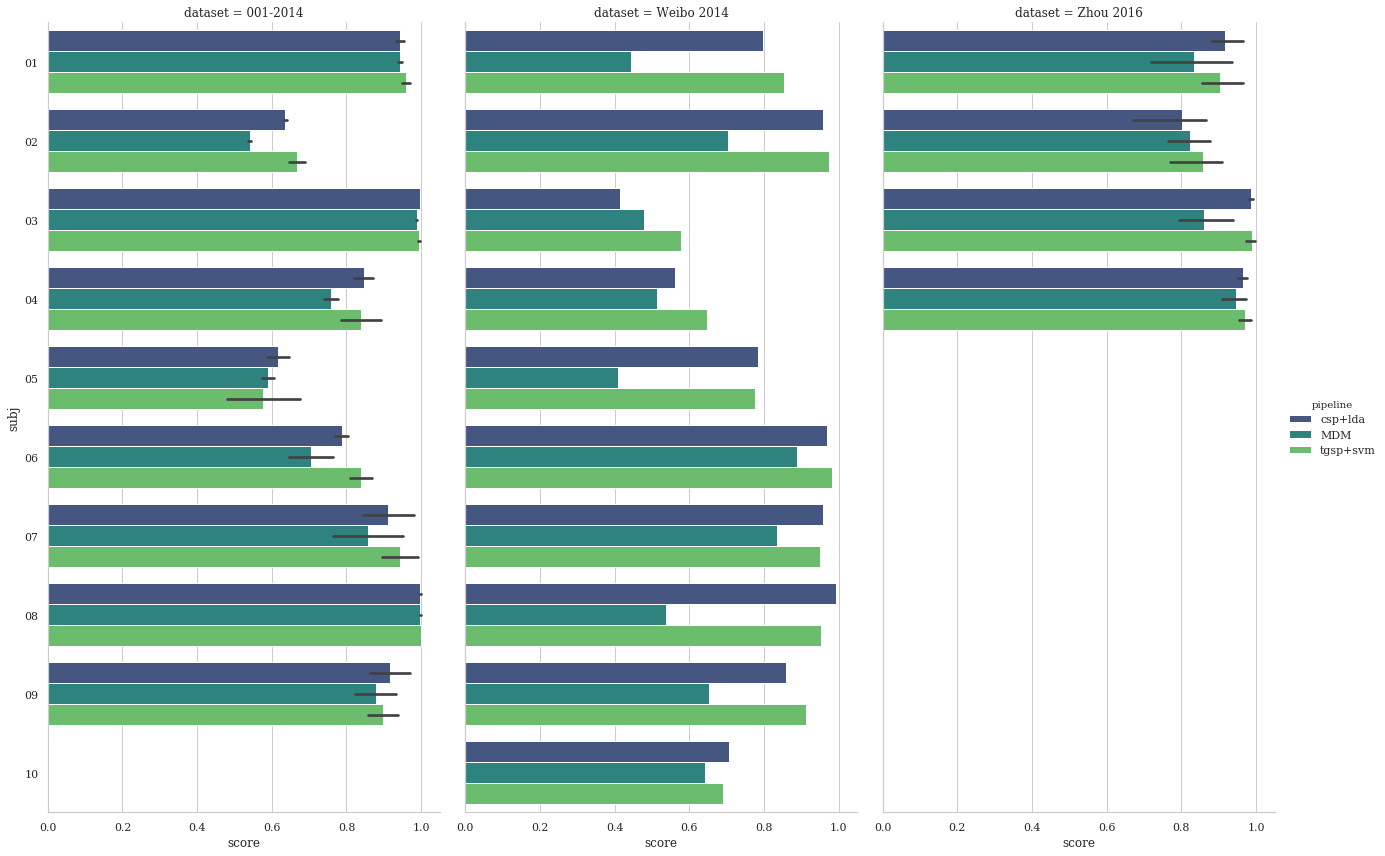

In [7]:
results = pd.read_csv('../results/results_part2-3.csv')
results["subj"] = [str(resi).zfill(2) for resi in results["subject"]]
g = sns.catplot(kind='bar', x="score", y="subj", hue="pipeline", col="dataset", height=12, aspect=0.5, data=results, orient='h', palette='viridis')

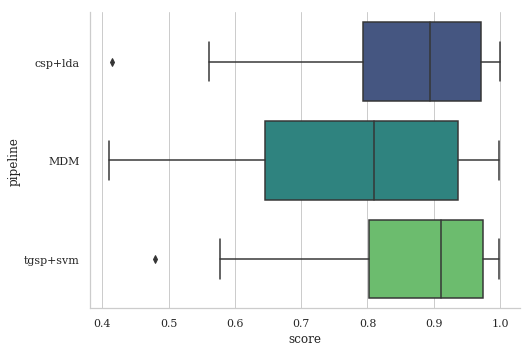

In [8]:
g = sns.catplot(kind="box", x="score", y="pipeline", aspect=1.5, data=results, orient='h', palette='viridis')

Until now, we have always plotted the results using the seaborn package and creating the figure by ourselves. MOABB also offers some functionalities for analysing the results obtained after running an evaluation procedure.

For instance, we may create a plot comparing the results with two classification algorithms as in:

2019-09-04 11:32:11 desktop-270 matplotlib.axes._axes[1324] WARNING 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


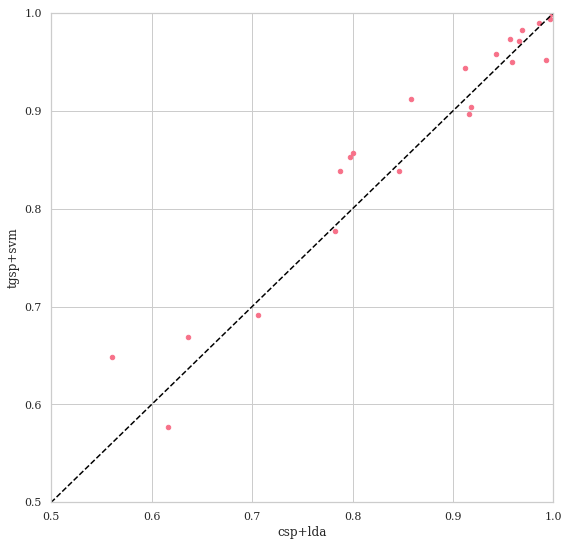

In [18]:
alg1 = 'csp+lda'
alg2 = 'tgsp+svm'
fig = moabb.analysis.plotting.paired_plot(results, alg1, alg2)
fig.set_size_inches(9,9)

N.B.: MOABB collapses the values from different sessions into a single average score, which is why we have the impression of having much less points than it should in the plot.

We may also do statistical analysis on the results and plot them with MOABB. For this, we need to first generate an auxiliary dataframe containing all the statistics describing the results and, then, use it as input.

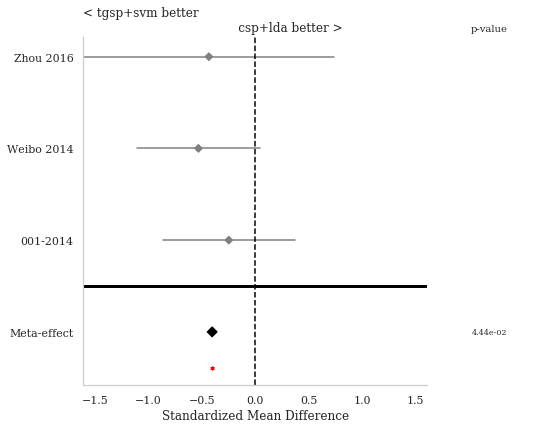

In [38]:
stats_df = moabb.analysis.meta_analysis.compute_dataset_statistics(results)
alg1 = 'csp+lda'
alg2 = 'tgsp+svm'
fig = moabb.analysis.plotting.meta_analysis_plot(stats_df, alg1, alg2)
fig.set_size_inches(8,7)